In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import geopandas
import numpy as np

In [70]:
data = pd.read_csv("all_v2.csv")

In [71]:
data.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [73]:
profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)

In [74]:
%%time
profile.to_file("real_estate.html")

/Users/borisevich.vd/venv/lib/python3.8/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))



CPU times: user 5min 27s, sys: 29.5 s, total: 5min 56s
Wall time: 5min 43s


In [11]:
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.geo_lon, data.geo_lat))

In [23]:
gdf.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,geometry
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,POINT (30.37614 59.80581)
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,POINT (37.29740 55.68381)
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,POINT (44.06164 56.29525)
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,POINT (39.07478 44.99613)
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,POINT (37.98464 55.91877)


In [59]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

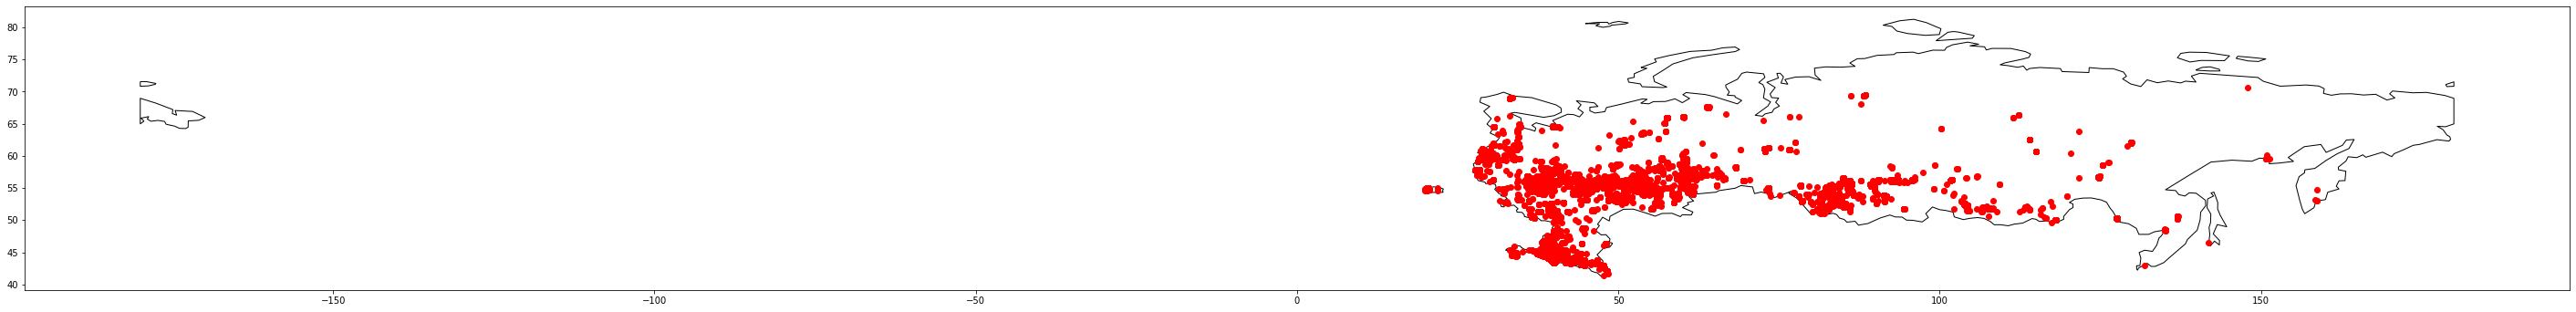

In [46]:
ax = world[world.name == 'Russia'].plot(
    color='white', edgecolor='black',figsize=(50,50))
gdf.sample(100000).plot(ax=ax, color='red')
plt.show()